<a href="https://colab.research.google.com/github/alimoorreza/CS167-sp25-notes/blob/main/Day14_Dimensionality_Reduction_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS167: Day14
## Dimensionality Reduction

#### CS167: Machine Learning, Spring 2025


📜 [Syllabus](https://analytics.drake.edu/~reza/teaching/cs167_sp25/cs167_syllabus_sp25.pdf)

## Dimensionality Reduction Techniques:
1. __Feature Selection/Elimination__: choose which features are important
2. __Feature Extraction__: transforming raw data into numeric features that can be processed while preserving the information in the original dataset

# 1. Feature Selection/Elimination:

__Big Idea__: Choose only the important existing features, and use those for classification or regression.

## 💬 Group Discussion:

See if you and your group can come up with some ways to tell how important a variable (i.e. column) is for making a machine learning prediction.

Ideas:
- Try machine learning with one column at a time... pick the columns that give you the best performance.
- Build a decision tree or Random Forest and look at the `feature_importances_` attribute (which is built from __information gain__).
- Statistical tests: chi squared, F-value, etc.

## Advantages of Feature Selection/Elimination:

- Simplicity--easily interpretable
- maintaining the interpretability of your variables (in comparison to feature extraction)

## Disadvantages of Feature Selection/Elimination:

- you lose data by dropping columns

## Feature Selection Code:

Documentation: [`sklearn.feature_selection.SelectKBest()`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest    # feature selection from sklearn

In [ ]:
path = '/content/drive/MyDrive/cs167_sp25/datasets/irisData.csv'
data = pandas.read_csv(path)
predictors = ['sepal length', 'sepal width', 'petal length', 'petal width']
target = "species"

train_data, test_data, train_sln, test_sln = \
    train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)

In [ ]:
train_data.head(5)

,sepal length,sepal width,petal length,petal width
79,5.7,2.6,3.5,1.0
54,6.5,2.8,4.6,1.5
106,4.9,2.5,4.5,1.7
90,5.5,2.6,4.4,1.2
145,6.7,3.0,5.2,2.3


In [ ]:
# fit your selector just like you do when training with a classifier/regressor
# only do this after splitting into train and test sets - don't let the test
# set spoil your predictions
from sklearn.feature_selection import SelectKBest    # feature selection from sklearn

selector = SelectKBest(k=2)
selector.fit(train_data, train_sln)

# bigger number means the feature is more important
print('Here are the scores of each feature:')
print(selector.scores_)
print(predictors)

Here are the scores of each feature:
[ 83.17181699  48.65999233 962.36229917 894.63459428]
['sepal length', 'sepal width', 'petal length', 'petal width']


In [ ]:
#transforming the predictor columns of the training set
train_transformed = selector.transform(train_data)

print("Here's what the training predictors look like after the transformation. \
Notice that it's just the last two columns from the original data.")
train_transformed[0:5]

Here's what the training predictors look like after the transformation. Notice that it's just the last two columns from the original data.


array([[3.5, 1. ],
       [4.6, 1.5],
       [4.5, 1.7],
       [4.4, 1.2],
       [5.2, 2.3]])

In [ ]:
#take a look at the training data
train_data[0:5]

,sepal length,sepal width,petal length,petal width
79,5.7,2.6,3.5,1.0
54,6.5,2.8,4.6,1.5
106,4.9,2.5,4.5,1.7
90,5.5,2.6,4.4,1.2
145,6.7,3.0,5.2,2.3


In [ ]:
#Now we transform the predictor columns in the test set as well.
#Notice that we're using the selector that we trained using the training set.
#Do not re-fit it to the test data.
test_transformed = selector.transform(test_data)

#Now we can use our transformed data with a classifier just like always:
knn_clf = KNeighborsClassifier()
knn_clf.fit(train_transformed,train_sln)
predictions = knn_clf.predict(test_transformed)
print('Accuracy:',accuracy_score(test_sln,predictions))

Accuracy: 0.9333333333333333


Let's compare it to a model trained on all of the data:

In [ ]:
clf = KNeighborsClassifier()
clf.fit(train_data,train_sln)
predictions = clf.predict(test_data)
print('Accuracy:',accuracy_score(test_sln,predictions))

Accuracy: 0.9666666666666667


## Feature Selection Code (all together)

In [ ]:
#load data first (we already did it)

# create an instance of 'SelectKBest'
selector = SelectKBest(k=2)

# fit it on your train data and solutions
selector.fit(train_data, train_sln)

# transform your traning data to only have the k best attributes
train_transformed = selector.transform(train_data)
test_transformed = selector.transform(test_data)


#build a model
knn_clf = KNeighborsClassifier()
knn_clf.fit(train_transformed,train_sln)
predictions = knn_clf.predict(test_transformed)
print('Accuracy:',accuracy_score(test_sln,predictions))

Accuracy: 0.9333333333333333


# 💬 Group Exercise (1):

Let's give it a shot:
- below, I went ahead and loaded in the penguin dataset 🐧
- Using `species` as the target variable, what are the 3 best attributes?
- Build a default Random Forest using only the 3 best attributes. How does the performance compare to a default random forest that uses all of the predictor variables?

In [ ]:
path = '/content/drive/MyDrive/cs167_sp25/datasets/penguins_size.csv'
data = pandas.read_csv(path)
print('data.shape: ', data.shape)
print('data without preprocessing the columns: \n')
data.head()

data.shape:  (344, 7)
data without preprocessing the columns: 



,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
# data prep: dummies, replace, and drop missing data
data = pandas.get_dummies(data, columns=['island'])
data.sex.replace('MALE', 0, inplace=True)
data.sex.replace('FEMALE', 1, inplace=True)
data.sex.replace('.', 1, inplace=True)
data.dropna(inplace=True)
print('data.shape: ', data.shape)
data.head()

In [ ]:
target = "species"
predictors = data.columns.drop(target)

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.20, random_state=41)
train_data.head()
print('shape of our data: ', train_data.shape)

shape of our data:  (267, 8)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=41)
rf.fit(train_data,train_sln)
predictions = rf.predict(test_data)
print('Accuracy:',accuracy_score(test_sln,predictions))

Accuracy: 1.0


#__Finish the rest (group work)__

In [ ]:
# import the necessary functions
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score

# create an instance of 'SelectKBest' with 3 seleted features


# fit it on your train data and solutions


# transform your train and test data to only have the k best attributes



#-------------------------------------------------------------------------------
# train a random forest classifier with the k best attributes
rf = RandomForestClassifier()
rf.fit( train_data_trans, train_sln ) # TRAINING STEP OF RANDOM FOREST
pred = rf.predict( test_data_trans )  # INFERENCE/TESTING STEP OF RANDOM FOREST

# evalute your trained random forest in accuracy metrics
acc = accuracy_score( test_sln, pred )
print(acc)



train_data_trans.shape:  (267, 6)
test_data_trans.shape:  (67, 6)
0.9850746268656716


# 2. Feature Extraction:

If you are working with high dimensional data, it is often advantageous to do some __feature extraction__ before building and testing your machine learning models.

__Feature extraction__ takes the existing (usually high dimensional) dataset, and returns a dataset such that there are new columns of data that are ordered from most important to least important.

__Big Idea__: Find new or _latent_ features made up of combinations of existing features.

Example:
- Maybe multiplying `sepal length * petal width` is more helpful in identyfing the species of an iris than either `sepal length` or `petal width` are on their own.

## Measurable vs Latent Features

__Example__: 🏡🏷

Imagine we are attempting to predict the price of a house based on the following measurable features:
- house square footage
- number of rooms
- school district test scores
- neighborhood amenities

### 💬 Group Discussion:
__claim__: In the 4 _measurable features_ above, there are really only __two latent features__ which explain these four measurable features. In other words, there are two composite features that more directly probe the underlying phenomenon of the data.

Can you see the pattern and guess what these __two latent features__ are?

## Example: Measurable v Latent Features:

Size of house:
- house square footage
- number of rooms

Location of house:
- school district test scores
- neighborhood amenities

# Principal Component Analysis (PCA)

Principal Component Analysis is an __unsupervised__ algorithm as it doesn't use a target column.
- PCA is a __feature extraction__ technique
- PCA is a __preprocessing__ technique (something that you do during data prep, before building/running your model).

__Big Idea__: Can we extract information from the data that might prove to be more useful?
- reduce dimensions of inputs to learning algorithms
- easier to understand and graph
- reduce noise

## High-Level Overview of PCA:

Calculating PCA requires a relatively deep background in linear algebra--calculating the eigenvectors and their corresponding eigenvalues of covariance matrices. So... we're going to stick to a practical level of understanding.

https://setosa.io/ev/principal-component-analysis/

## Advantages of Feature Extraction (PCA):

- Minimal data loss
- Output is ordered by how well each component predicts the dependent variable.

## Disadvantages of Feature Extraction (PCA):

- data becomes much less interpretable

## When should I use PCA?

Ask yourself these questions:

1. Do you want to __reduce the number of variables__, but aren't able to identify variables to copmletely remove from consideration?

2. Do you want to ensure your variables are __independent of one another__?
    - __independence__: variables are independent if and only if the occurrence of one does not affect the probability of the occurence of the other.

3. Are you comfortable making your independent variables __less interpretable__?

If the answers to the above questions are yes, then doing a PCA on your data before you build/run your model is probably a good idea.

## PCA Code:
Documentation: [`sklearn.decomposition.PCA()`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [ ]:
import pandas
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

#load data
path = '/content/drive/MyDrive/cs167_sp25/datasets/irisData.csv'
data = pandas.read_csv(path)
predictors = ['sepal length', 'sepal width', 'petal length', 'petal width']
target = "species"

train_data, test_data, train_sln, test_sln = \
    train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)

train_data.head(5)


,sepal length,sepal width,petal length,petal width
79,5.7,2.6,3.5,1.0
54,6.5,2.8,4.6,1.5
106,4.9,2.5,4.5,1.7
90,5.5,2.6,4.4,1.2
145,6.7,3.0,5.2,2.3


In [ ]:
# whiten = True is important for uncorrelated
# attributes, and is False by default
pca_extractor = PCA(n_components=2, whiten=True)
# When fitting with PCA, you do not use the target column -
#               this is an unsupervised learning algorithm
pca_extractor.fit(train_data)

print('this is the variance/importance of each component')
print(pca_extractor.explained_variance_ratio_)

this is the variance/importance of each component
[0.92185361 0.05522532]


In [ ]:
print("Here's what the data looks like before being transformed:")
train_data[0:5]

Here's what the data looks like before being transformed:


,sepal length,sepal width,petal length,petal width
79,5.7,2.6,3.5,1.0
54,6.5,2.8,4.6,1.5
106,4.9,2.5,4.5,1.7
90,5.5,2.6,4.4,1.2
145,6.7,3.0,5.2,2.3


In [ ]:
train_transformed = pca_extractor.transform(train_data)

print("Here's what the training predictors look \
like after the transformation.")
train_transformed[0:5]

Here's what the training predictors look like after the transformation.


array([[-0.14247446, -0.74168385],
       [ 0.52354614,  0.15216911],
       [ 0.25775022, -2.45414817],
       [ 0.22837852, -1.3551112 ],
       [ 0.93305811,  0.32233582]])

In [ ]:
#Now we transform the predictor columns in the test set as well.
#Notice that we're using the extractor that we trained using the training set.
#Do not re-fit it to the test data.
test_transformed = pca_extractor.transform(test_data)

#Now we can use our transformed data with a classifier just like always:
clf = KNeighborsClassifier()
clf.fit(train_transformed,train_sln)
predictions = clf.predict(test_transformed)
print('Accuracy:',accuracy_score(test_sln,predictions))

Accuracy: 0.9333333333333333


In [ ]:
print('Here are the two vectors (in the original space) that define our 2 new axes:')
print(pca_extractor.components_[0])
print(pca_extractor.components_[1])

Here are the two vectors (in the original space) that define our 2 new axes:
[ 0.35503041 -0.09364147  0.85845905  0.35809601]
[ 0.6991275   0.68599282 -0.16756386 -0.11205774]


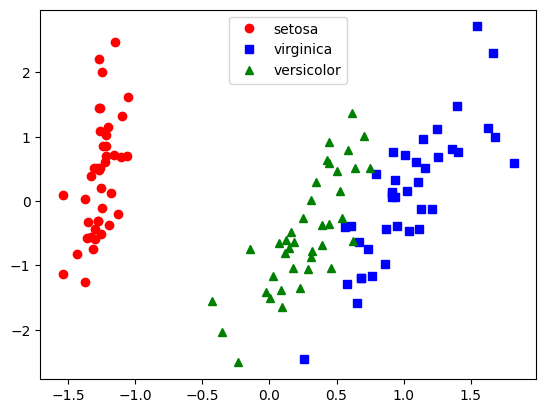

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

#visualizing the new axes
#PCA gives it back as numpy array
tdf = pandas.DataFrame(train_transformed)
#next line: probably not the best way
tdf['species'] = pandas.Series(list(train_sln))


setosa_series = tdf[ tdf['species'] == 'Iris-setosa' ]
virginica_series = tdf[ tdf['species'] == 'Iris-virginica' ]
versicolor_series = tdf[ tdf['species'] == 'Iris-versicolor']

plt.plot(setosa_series[0],setosa_series[1],'ro',label='setosa')
plt.plot(virginica_series[0],virginica_series[1],'bs',label='virginica')
plt.plot(versicolor_series[0],versicolor_series[1],'g^',label='versicolor')
plt.legend(loc='upper center')
plt.show()

# PCA Code (all together)

In [ ]:
from sklearn.decomposition import PCA

# build your PCA extractor, decide how many output components (columns) you'd like
pca_extractor = PCA(n_components=2, whiten=True)

#When fitting with PCA, you do not use the target column - this is an unsupervised learning algorithm
pca_extractor.fit(train_data)

# transform your train_data and _test_data
train_transformed = pca_extractor.transform(train_data)
test_transformed = pca_extractor.transform(test_data)

#build and test your model
clf = KNeighborsClassifier()
clf.fit(train_transformed,train_sln)
predictions = clf.predict(test_transformed)
print('Accuracy:',accuracy_score(test_sln,predictions))

Accuracy: 0.9333333333333333


# 💬 Group Programming Exercise:

1. Input the boston housing dataset (download from Blackboard datasets)
    - `MEDV` is our target variable, the median home value in $10000s
2. Use PCA to reduce the dimensions to 2
3. Run a [KNeighborsRegressor()](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) on your transformed data


In [ ]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn import metrics


# load data
path = '/content/drive/MyDrive/cs167_sp25/datasets/boston_housing.csv'
housing_data = pandas.read_csv(path)

# clean the data
housing_data['CRIM'].fillna(housing_data['CRIM'].mean(),inplace=True)
housing_data['ZN'].fillna(housing_data['ZN'].mean(),inplace=True)
housing_data['INDUS'].fillna(housing_data['INDUS'].mean(),inplace=True)
housing_data['CHAS'].fillna(housing_data['CHAS'].mean(),inplace=True)
housing_data['AGE'].fillna(housing_data['AGE'].mean(),inplace=True)
housing_data['LSTAT'].fillna(housing_data['LSTAT'].mean(),inplace=True)

# Split the data into the training data and testing data
target= 'MEDV'
predictors = housing_data.columns.drop(target) # use all of the columns except for MEDV
train_data, test_data, train_sln, test_sln = train_test_split(housing_data[predictors], housing_data[target], test_size = 0.2, random_state=41)

print('train_data.shape', train_data.shape)
# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)

In [ ]:
# your code here
from sklearn.neighbors import KNeighborsRegressor
from sklean.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error


# instantiate PCA with 2 dimension feature extraction


# fit train_data using PCA


# transform train_data as well as test_data using the PCA


# train + test transformed data using KNN
